In [1]:
# Prediction of Churn user 
# 1 EDA
# 2 Data preparation
# 3 Visualization
# 4 Machine learning algorithms

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('E://DATASETS//WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Finding the blanks in data/checking missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
# Pandas didn't detect all values in total charges as float so we are going to convert those values 
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
data.loc[data['TotalCharges'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [5]:
# Looks like the blank ‘TotalCharges’ values were for customers with 0 months tenure. We will adjust these values to $0.
data[data['TotalCharges'].isna()==True] = 0
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service', 0], dtype=object)

In [6]:
# Next we’ll convert the categorical values into numeric values
data['gender'].replace(['Male','Female'],[0,1],inplace=True)
data['Partner'].replace(['Yes','No'],[1,0],inplace=True)
data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
data['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
data['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
data['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
data['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
data['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
data['Churn'].replace(['Yes','No'],[1,0],inplace=True)

data.pop('customerID')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18)
memory usage: 1.1 MB


In [7]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.494534,0.162147,0.481755,0.298026,32.371149,0.901888,0.421269,1.222206,0.286100,0.344314,0.343320,0.289649,0.383785,0.387761,0.687491,0.591793,1.313503,64.697004,2279.734304,0.265370
std,0.500006,0.368612,0.499702,0.457424,24.559481,0.297487,0.493798,0.779535,0.451969,0.475178,0.474851,0.453632,0.486341,0.487274,0.832727,0.491537,1.149799,30.171186,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.450000,398.550000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


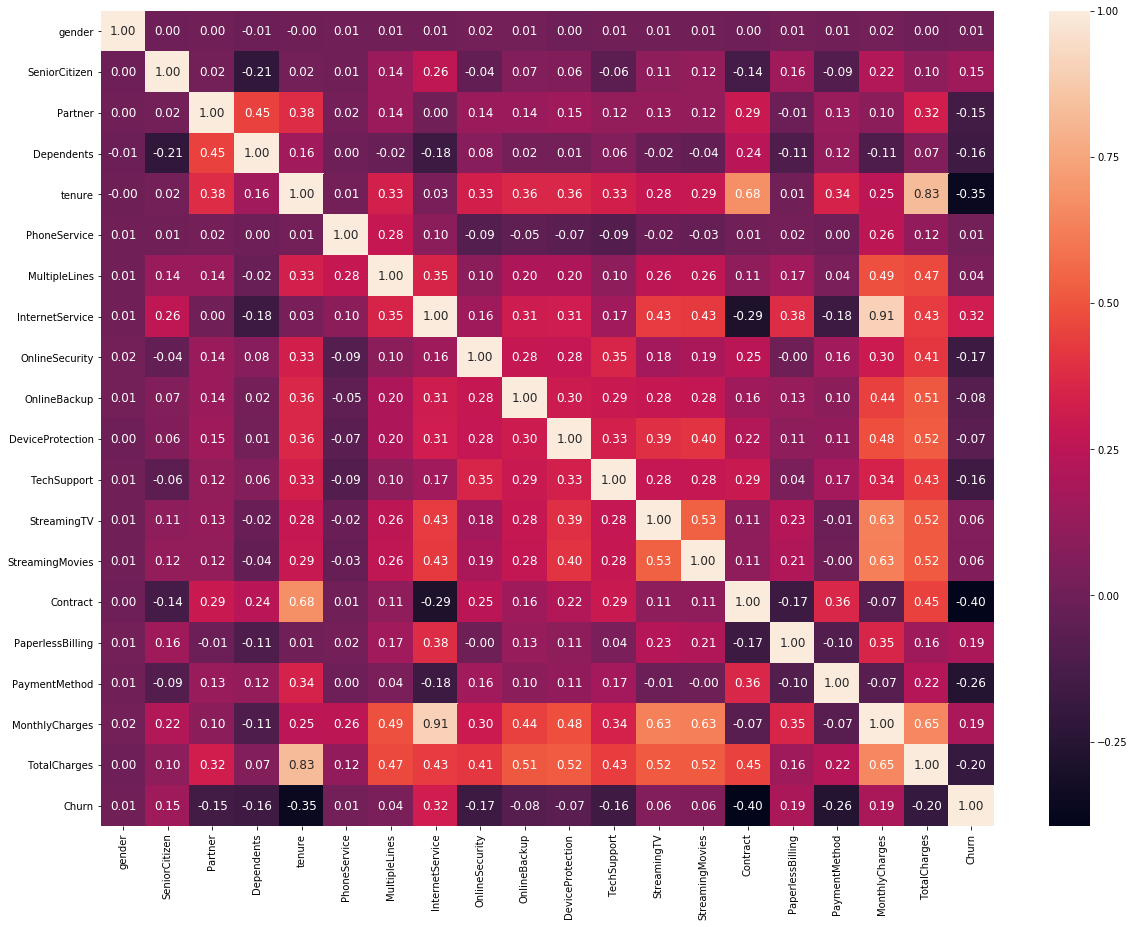

In [8]:
# Correlations between customer data features and customer churn
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12},fmt='.2f')
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
#plt.savefig('E:\\Churn_predicitionHeatmap.png')

In [9]:
# To avoid Multicollinearity we had to pop out total charges as total charges and monthly charges are strong postively correlated
data.pop('TotalCharges')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
5        820.50
6       1949.40
7        301.90
8       3046.05
9       3487.95
10       587.45
11       326.80
12      5681.10
13      5036.30
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19      1862.90
20        39.65
21       202.25
22        20.15
23      3505.10
24      2970.30
25      1530.60
26      4749.15
27        30.20
28      6369.45
29      1093.10
         ...   
7013    3756.40
7014    3645.75
7015    2874.45
7016      49.95
7017    1020.75
7018      70.65
7019     826.00
7020     239.00
7021     727.80
7022    7544.30
7023    6479.40
7024    3626.35
7025    1679.40
7026     403.35
7027     931.55
7028    4326.25
7029     263.05
7030      39.25
7031    3316.10
7032      75.75
7033    2625.25
7034    6886.25
7035    1495.10
7036     743.30
7037    1419.40
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Leng

In [10]:
# We will consider several different models to predict customer churn. To ensure we are not over-fitting to our data, 
# we will split the 7,043 customer records into a training and test set, with the test set being 25% of the total records.
from sklearn.model_selection import train_test_split 
data["Churn"] = data["Churn"].astype(int)
Y = data["Churn"].values
X = data.drop(labels = ["Churn"],axis = 1)
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [11]:
# Logistic regression is one of the more basic classification algorithms in a data scientist’s toolkit
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
result = model.fit(X_train, y_train)

C:\Users\Manoj Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


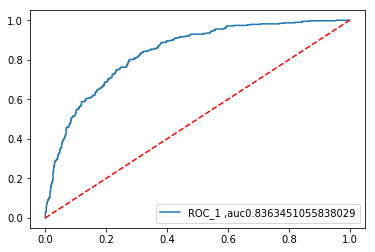

In [12]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label = 'ROC_1 ,auc'+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.legend(loc = 4)
plt.show()

Intercept: [-0.86490541]
Regression: [[-0.01128096  0.25801579  0.00993253 -0.17544224 -0.03497744 -0.7149745
   0.22570314  0.64887872 -0.37216157 -0.21748094 -0.04571449 -0.37743031
   0.22639161  0.15647202 -0.63079565  0.43158405 -0.14554141  0.00969178]]
Accuracy of logistic regression classifier on test set: 0.80
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1026
           1       0.68      0.51      0.58       383

   micro avg       0.80      0.80      0.80      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



Text(0.5,15,'predicted label')

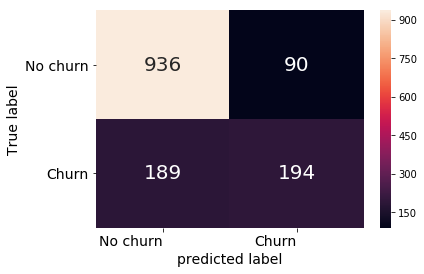

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
prediction_test = model.predict(X_test)
confusion_matrix = confusion_matrix(y_test,prediction_test)
print('Intercept: ' + str(model.intercept_))
print('Regression: ' + str(model.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))
print(classification_report(y_test, prediction_test))
confusion_matrix_df = pd.DataFrame(confusion_matrix,('No churn','Churn'),('No churn','Churn'))
heatmap = sns.heatmap(confusion_matrix_df,annot=True,annot_kws={"size":20},fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation = 0,ha='right',fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation = 0,ha='right',fontsize = 14)
plt.ylabel('True label',fontsize = 14)
plt.xlabel('predicted label',fontsize = 14)

We got 80% classification accuracy from our logistic regression classifier. But the precision and recall for predictions 
    in the positive class (churn) are relatively low, which suggests our data set may be imbalanced

### How to handle imbalanced classes

It is also important to look at the distribution of how many customers churn. If 95% of customers don’t churn, we can achieve 95% accuracy by building a model that simply predicts that all customers won’t churn. But this isn’t a very useful model, because it will never tell us when a customer will churn, which is what we are really interested in.

In [14]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

The class for churn is only around 25% of the total population of samples. 
There is a real risk that a model trained on this data may only make too many predictions in favour of the majority class. 
There are a number of techniques for handling imbalanced classes:

1.Up-sampling the minority class: To balance the data set, we can randomly duplicate observations from the minority class

2.Down-sampling the majority class: we reduce the number of samples in the majority class to be equal to the number of samples in the minority class. 



### Up-sampling the minority class

In [15]:
from sklearn.utils import resample

data_majority = data[data['Churn']==0]
data_minority = data[data['Churn']==1]

data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=5174, #same number of samples as majority classe
random_state=1) #set the seed for random resampling
# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

data_upsampled['Churn'].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [16]:
train, test = train_test_split(data_upsampled, test_size = 0.25)

train_y_upsampled = train['Churn']
test_y_upsampled = test['Churn']

train_x_upsampled = train
train_x_upsampled.pop('Churn')
test_x_upsampled = test
test_x_upsampled.pop('Churn')

logisticRegr_balanced = LogisticRegression()
logisticRegr_balanced.fit(X=train_x_upsampled, y=train_y_upsampled)

test_y_pred_balanced = logisticRegr_balanced.predict(test_x_upsampled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr_balanced.score(test_x_upsampled, test_y_upsampled)))
print(classification_report(test_y_upsampled, test_y_pred_balanced))

Accuracy of logistic regression classifier on test set: 0.75
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1319
           1       0.73      0.80      0.76      1268

   micro avg       0.75      0.75      0.75      2587
   macro avg       0.76      0.76      0.75      2587
weighted avg       0.76      0.75      0.75      2587



C:\Users\Manoj Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The overall accuracy of the model has decreased, but the precision and recall scores for predicting a churn have improved. 
There are a number of other ways to deal with imbalanced classes

### Using a different performance metric

In [17]:
from sklearn.metrics import roc_auc_score

# Get class probabilities for both models
test_y_prob = model.predict_proba(X_test)
test_y_prob_balanced = logisticRegr_balanced.predict_proba(test_x_upsampled)

# We only need the probabilities for the positive class
test_y_prob = [p[1] for p in test_y_prob]
test_y_prob_balanced = [p[1] for p in test_y_prob_balanced]

print('Unbalanced model AUROC: ' + str(roc_auc_score(y_test, test_y_prob)))
print('Balanced model AUROC: ' + str(roc_auc_score(test_y_upsampled, test_y_prob_balanced)))

Unbalanced model AUROC: 0.8363451055838029
Balanced model AUROC: 0.8404688931247505


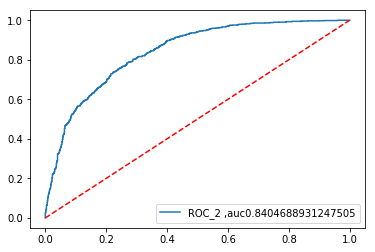

In [18]:
fpr, tpr, _ = metrics.roc_curve(test_y_upsampled,test_y_prob_balanced)
auc = metrics.roc_auc_score(test_y_upsampled, test_y_prob_balanced)
plt.plot(fpr,tpr,label = 'ROC_2 ,auc'+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.legend(loc = 4)
plt.show()

In [19]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

InternetService     0.648879
PaperlessBilling    0.431584
SeniorCitizen       0.258016
StreamingTV         0.226392
MultipleLines       0.225703
StreamingMovies     0.156472
Partner             0.009933
MonthlyCharges      0.009692
gender             -0.011281
tenure             -0.034977
DeviceProtection   -0.045714
PaymentMethod      -0.145541
Dependents         -0.175442
OnlineBackup       -0.217481
OnlineSecurity     -0.372162
TechSupport        -0.377430
Contract           -0.630796
PhoneService       -0.714975
dtype: float64

### Tree-based algorithms
Using tree-based algorithms such as decision trees or random forests can result in good models for unbalanced datasets. If the minority class exists in one area of the feature space, a tree will be able to separate the class into a single node. For example, if 99% of customers who stream movies tend to churn, then a tree-based algorithm will likely pick this up. We will look at the results for two of these algorithms in the next section.

Decision Trees

A decision tree is a supervised learning method that makes a prediction by learning simple decision rules from the explanatory variables. Decision trees have the following advantages:

1. Trees can be visualised, which makes them easy to interpret
2. They can handle numerical and categorical data
3. We can easily validate the model using statistical tests

The downsides to decision trees:

1. Decision trees are very prone to overfitting the training data, and often do not generalise well

2. Small variations in the training data can cause a completely different tree to be generated

3. Decision tree learning algorithms are based on heuristic algorithms like the greedy algorithm, which make locally optimal decisions at each node. These algorithms cannot guarantee a globally optimal decision tree

Despite their downsides, decision trees can be a good starting point for developing predictive models that generalise better, like random forests.



In [20]:
from sklearn import tree
from sklearn import tree
import graphviz 
 
# Create each decision tree (pruned and unpruned)
decisionTree_unpruned = tree.DecisionTreeClassifier()
decisionTree = tree.DecisionTreeClassifier(max_depth = 4)
 
# Fit each tree to our training data
decisionTree_unpruned = decisionTree_unpruned.fit(X=X_train, y=y_train)
decisionTree = decisionTree.fit(X=X_train, y=y_train)
 
# Generate PDF visual of decision tree
churnTree = tree.export_graphviz(decisionTree, out_file=None, 
                         feature_names = list(X_train.columns.values),  
                         class_names = ['No churn', 'Churn'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(churnTree)
graph.render('decision_tree.gv', view=True)

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
test_y_pred_dt = decisionTree.predict(X_test)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(decisionTree.score(X_test, y_test)))

### Random forests
Random forests are an ensemble learning method, where the results from multiple decision trees are combined to make a final prediction. For example, a random forest may be made up of 10 decision trees, 7 of which make a prediction for ‘churn’ and 3 of which make a prediction for ‘no churn’. The final prediction for the forest will be ‘churn’.

Tree ensembles have become very popular due to their impressive performance on many real world problems.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest.fit(X_train, y_train)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(X_test, y_test)))